In [163]:
import pandas as pd

# Load the CSV files into DataFrames
pc_legend_stats = pd.read_csv(r'C:\Users\altaa\Documents\GitHub\Apex-Legends-Research\Data_Retrieval\CSV_files\Stats Per Legend\Legend_Stats_PC_Filtered.csv')
ps_legend_stats = pd.read_csv(r'C:\Users\altaa\Documents\GitHub\Apex-Legends-Research\Data_Retrieval\CSV_files\Stats Per Legend\Legend_Stats_PS4_Filtered.csv')
xbox_legend_stats = pd.read_csv(r'C:\Users\altaa\Documents\GitHub\Apex-Legends-Research\Data_Retrieval\CSV_files\Stats Per Legend\Legend_Stats_Xbox_Filtered.csv')

# Add 'platform' column to each DataFrame
pc_legend_stats['platform'] = 'PC'
ps_legend_stats['platform'] = 'PlayStation'
xbox_legend_stats['platform'] = 'Xbox'


In [164]:
# Combine all DataFrames into one
legend_stats = pd.concat([pc_legend_stats, ps_legend_stats, xbox_legend_stats], ignore_index=True)
#drop legend column
# legend_stats = legend_stats.drop(columns='legend')

legend_stats.head()

,player_name,legend,BR Kills,BR Damage,BR Wins,legend_category,platform
0,#1 Valkuraee_Twitch TV,Valkyrie,72440.0,18966877.0,0.0,Skirmisher,PC
1,#1 Valkuraee_Twitch TV,Revenant,11710.0,0.0,0.0,Skirmisher,PC
2,( `),Wraith,20463.0,182528.0,0.0,Skirmisher,PC
3,( `),Pathfinder,12285.0,212733.0,0.0,Skirmisher,PC
4,( `),Gibraltar,6584.0,479149.0,0.0,Support,PC


In [183]:
legend_stats.shape[0]

35821

In [184]:

(legend_stats == 0).sum()


player_name            0
legend                 0
BR Kills             333
BR Damage          14474
BR Wins            20218
legend_category        0
platform               0
PAS                   70
Cluster            33340
dtype: int64

In [165]:
# Calculate mean values for each Legend category
category_means = legend_stats.groupby('legend_category')[['BR Kills','BR Damage','BR Wins']].mean().reset_index()

# drip the unknow category
# category_means = category_means[category_means.legend_category != 'Unknown']

print("Average Stats per Legend Category:")
display(category_means)

# Calculate mean values grouped by platform and legend category
platform_category_means = legend_stats.groupby(['platform', 'legend_category'])[['BR Kills','BR Damage','BR Wins']].mean().reset_index()

# platform_category_means = platform_category_means[platform_category_means.legend_category != 'Unknown']

print("Average Stats by Platform and Legend Category:")
display(platform_category_means)

# Calculate mean values for each platform
platform_means = legend_stats.groupby('platform')[['BR Kills','BR Damage','BR Wins']].mean().reset_index()

print("Average Stats per Platform:")
display(platform_means)



Average Stats per Legend Category:


,legend_category,BR Kills,BR Damage,BR Wins
0,Assault,4454.129410,9.843550e+05,180.083238
1,Controller,3597.691985,7.904377e+05,141.796423
2,Recon,2722.600764,5.893133e+05,107.674905
3,Skirmisher,11614.036446,2.591729e+06,455.821591
4,Support,6424.668953,1.413905e+06,301.487932


Average Stats by Platform and Legend Category:


,platform,legend_category,BR Kills,BR Damage,BR Wins
0,PC,Assault,4346.584389,9.079307e+05,149.425241
1,PC,Controller,3954.074928,8.136692e+05,157.173631
2,PC,Recon,3025.531555,6.155838e+05,100.574496
3,PC,Skirmisher,13231.656225,2.841754e+06,469.285638
4,PC,Support,6303.873649,1.237316e+06,247.848296
5,PlayStation,Assault,5143.884246,1.172771e+06,219.839577
6,PlayStation,Controller,3450.088369,7.858426e+05,134.040936
7,PlayStation,Recon,2893.346517,6.448985e+05,132.213695
8,PlayStation,Skirmisher,12185.389092,2.770569e+06,506.668644
9,PlayStation,Support,7168.275694,1.584030e+06,368.493623


Average Stats per Platform:


,platform,BR Kills,BR Damage,BR Wins
0,PC,7562.557854,1.585109e+06,273.839581
1,PlayStation,7557.031465,1.707291e+06,330.873655
2,Xbox,5927.484702,1.364292e+06,253.474530


C:\Users\altaa\AppData\Local\Temp\ipykernel_52092\3321732086.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='legend_category', y='BR Kills', data=category_means, ax=axes[0], palette='Blues_d')
C:\Users\altaa\AppData\Local\Temp\ipykernel_52092\3321732086.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='legend_category', y='BR Damage', data=category_means, ax=axes[1], palette='Greens_d')
C:\Users\altaa\AppData\Local\Temp\ipykernel_52092\3321732086.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='legend_category', y='BR Wi

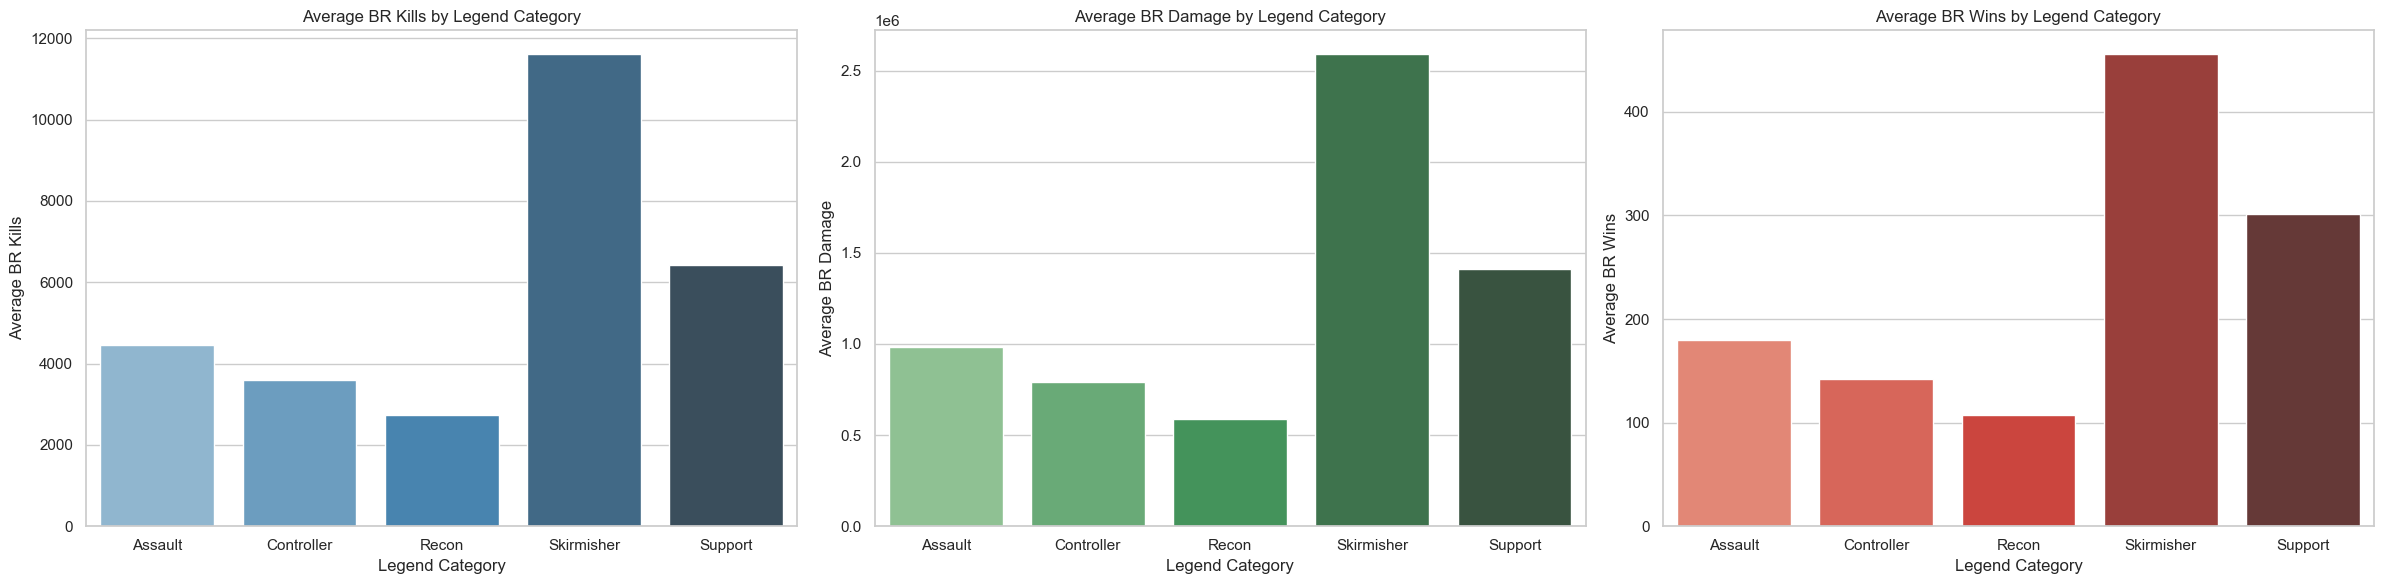

In [166]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
sns.set(style='whitegrid')

# Create subplots for BR Kills, BR Damage, and BR Wins
fig, axes = plt.subplots(1, 3, figsize=(24, 6))

# Bar plot for BR Kills by Legend Category
sns.barplot(x='legend_category', y='BR Kills', data=category_means, ax=axes[0], palette='Blues_d')
axes[0].set_title('Average BR Kills by Legend Category')
axes[0].set_xlabel('Legend Category')
axes[0].set_ylabel('Average BR Kills')

# Bar plot for BR Damage by Legend Category
sns.barplot(x='legend_category', y='BR Damage', data=category_means, ax=axes[1], palette='Greens_d')
axes[1].set_title('Average BR Damage by Legend Category')
axes[1].set_xlabel('Legend Category')
axes[1].set_ylabel('Average BR Damage')

# Bar plot for BR Wins by Legend Category
sns.barplot(x='legend_category', y='BR Wins', data=category_means, ax=axes[2], palette='Reds_d')
axes[2].set_title('Average BR Wins by Legend Category')
axes[2].set_xlabel('Legend Category')
axes[2].set_ylabel('Average BR Wins')

# Adjust layout
plt.tight_layout()
plt.show()


C:\Users\altaa\AppData\Local\Temp\ipykernel_52092\4101862011.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='platform', y='BR Kills', data=platform_means, ax=axes[0], palette='Blues_d')
C:\Users\altaa\AppData\Local\Temp\ipykernel_52092\4101862011.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='platform', y='BR Damage', data=platform_means, ax=axes[1], palette='Greens_d')
C:\Users\altaa\AppData\Local\Temp\ipykernel_52092\4101862011.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='platform', y='BR Wins', data=platform_mea

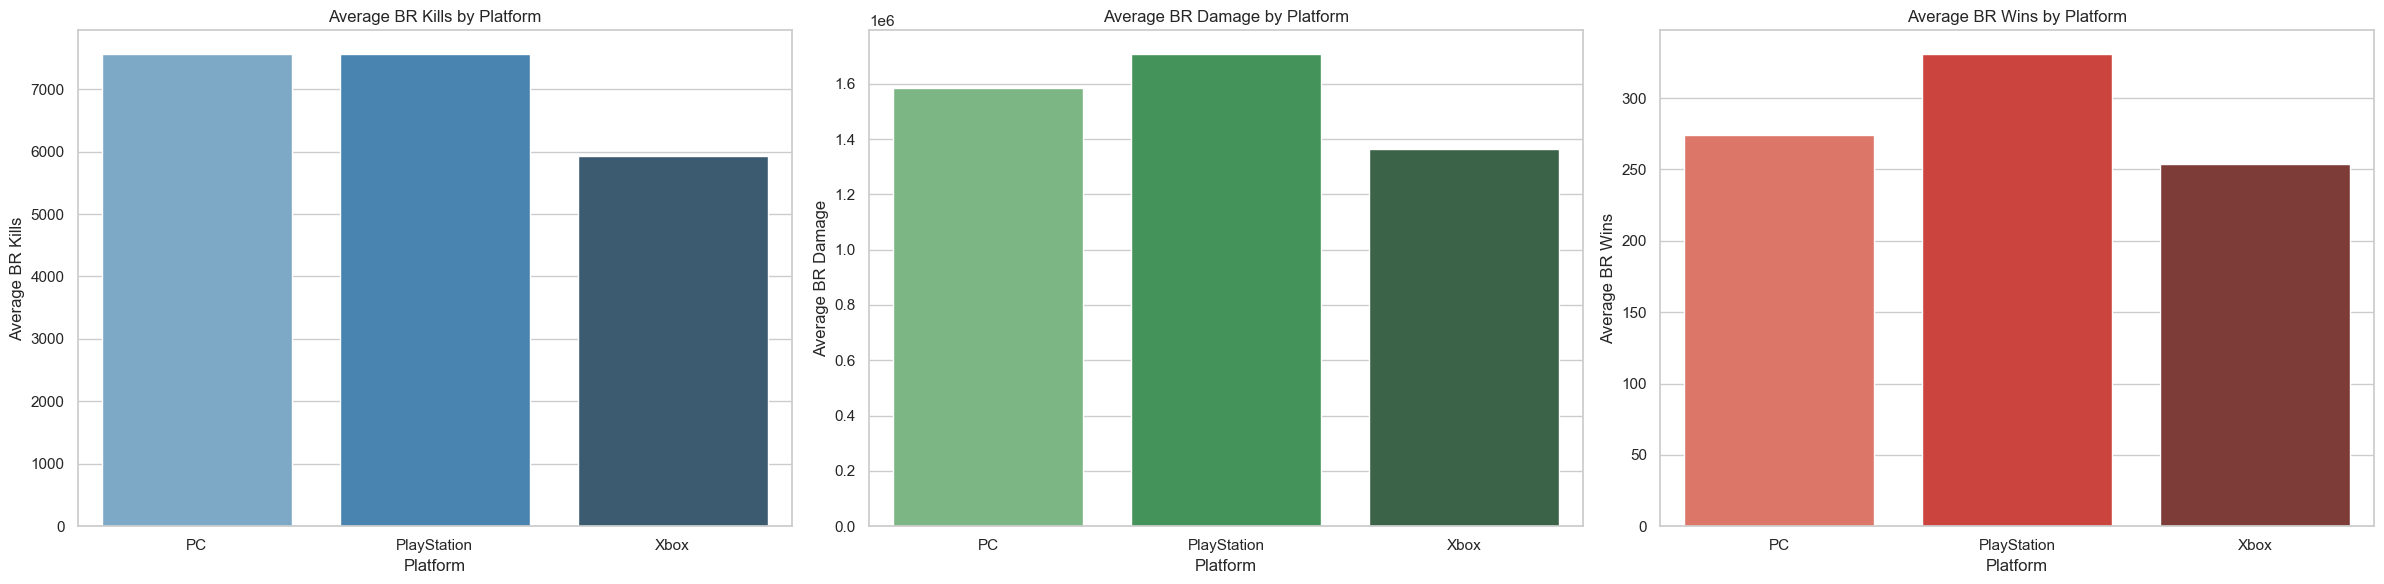

In [167]:
# Create subplots for BR Kills, BR Damage, and BR Wins
fig, axes = plt.subplots(1, 3, figsize=(24, 6))

# Bar plot for BR Kills by Platform
sns.barplot(x='platform', y='BR Kills', data=platform_means, ax=axes[0], palette='Blues_d')
axes[0].set_title('Average BR Kills by Platform')
axes[0].set_xlabel('Platform')
axes[0].set_ylabel('Average BR Kills')

# Bar plot for BR Damage by Platform
sns.barplot(x='platform', y='BR Damage', data=platform_means, ax=axes[1], palette='Greens_d')
axes[1].set_title('Average BR Damage by Platform')
axes[1].set_xlabel('Platform')
axes[1].set_ylabel('Average BR Damage')

# Bar plot for BR Wins by Platform
sns.barplot(x='platform', y='BR Wins', data=platform_means, ax=axes[2], palette='Reds_d')
axes[2].set_title('Average BR Wins by Platform')
axes[2].set_xlabel('Platform')
axes[2].set_ylabel('Average BR Wins')

# Adjust layout
plt.tight_layout()
plt.show()


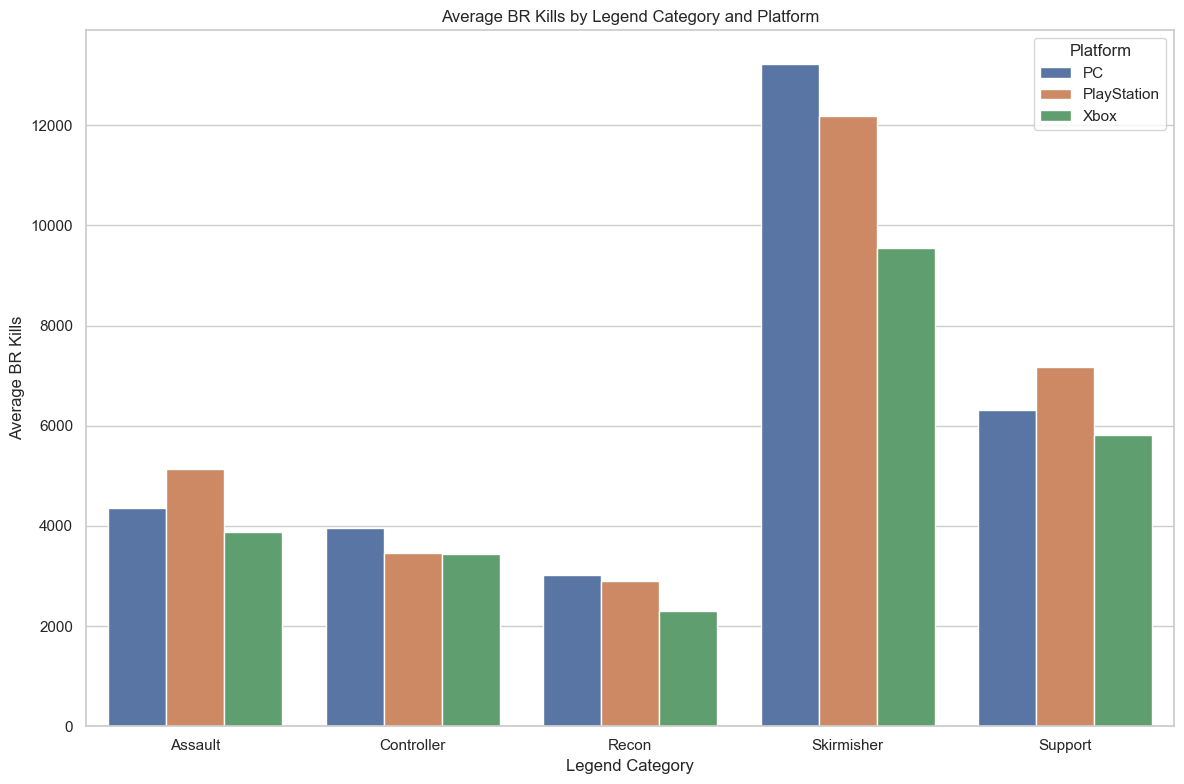

In [168]:
# Plotting Average BR Kills by Legend Category and Platform
plt.figure(figsize=(12, 8))
sns.barplot(x='legend_category', y='BR Kills', hue='platform', data=platform_category_means)
plt.title('Average BR Kills by Legend Category and Platform')
plt.xlabel('Legend Category')
plt.ylabel('Average BR Kills')
plt.legend(title='Platform')
plt.tight_layout()
plt.show()


In [169]:
legend_means = legend_stats.groupby('legend')[['BR Kills','BR Damage','BR Wins']].mean().reset_index()

# Sort Legends by average BR Wins in descending order for better visualization
legend_means = legend_means.sort_values(by='BR Kills', ascending=False)

# Display the results
print("Average Stats per Legend:")
display(legend_means)

Average Stats per Legend:


,legend,BR Kills,BR Damage,BR Wins
25,Wraith,21778.269608,5.202906e+06,821.131907
18,Pathfinder,14966.243914,3.291811e+06,626.093633
12,Lifeline,12795.591996,3.098751e+06,665.860707
11,Horizon,12456.172460,2.601724e+06,492.010384
3,Bangalore,9526.403500,2.197515e+06,418.260088
17,Octane,8851.428010,1.962840e+06,353.167076
24,Wattson,6309.157816,1.488098e+06,272.632012
13,Loba,6050.256688,1.383184e+06,319.597040
22,Valkyrie,5668.059057,1.218960e+06,242.664395
15,Mirage,4473.121188,8.894766e+05,210.546549


C:\Users\altaa\AppData\Local\Temp\ipykernel_52092\1832394261.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='legend', y='BR Wins', data=legend_means, palette='viridis')


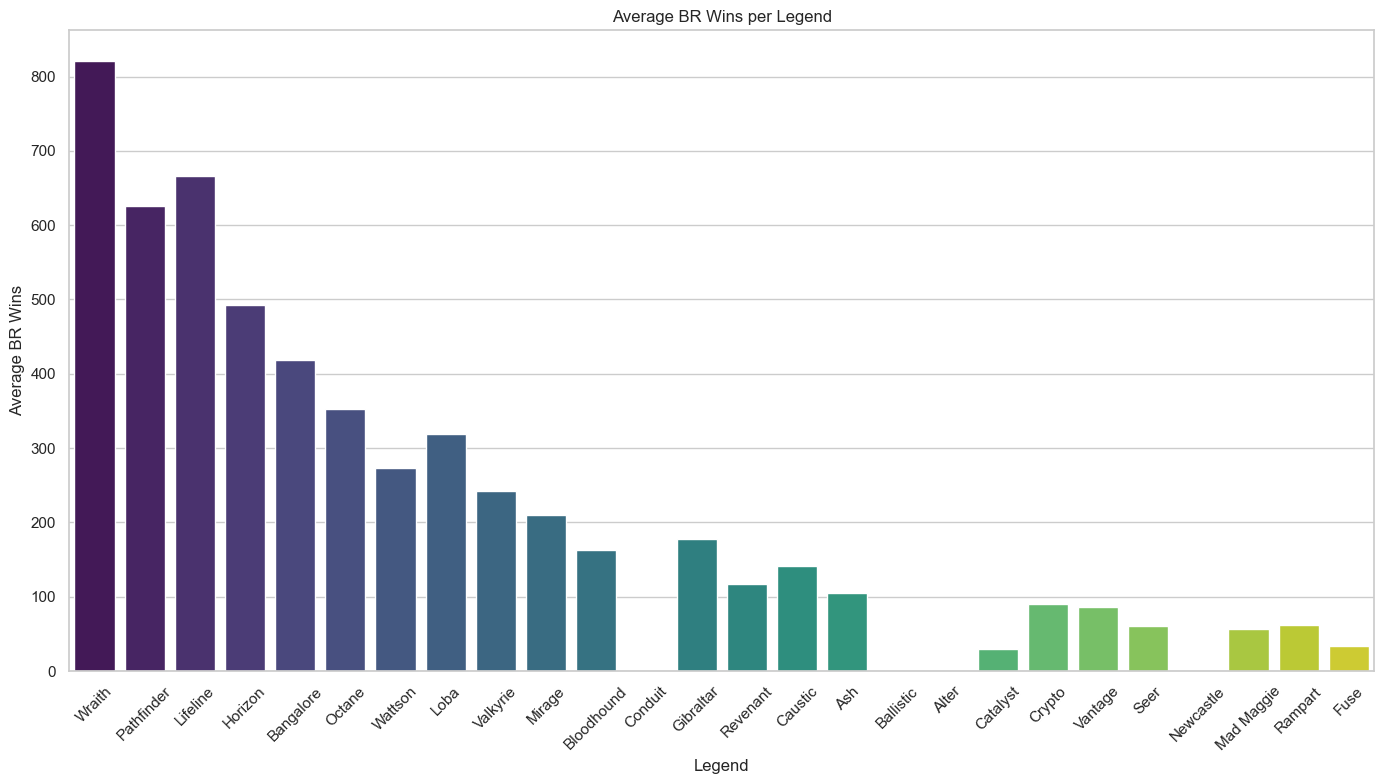

In [170]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
sns.set(style='whitegrid')

# Plot average BR Wins per Legend
plt.figure(figsize=(14, 8))
sns.barplot(x='legend', y='BR Wins', data=legend_means, palette='viridis')
plt.title('Average BR Wins per Legend')
plt.xlabel('Legend')
plt.ylabel('Average BR Wins')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\altaa\AppData\Local\Temp\ipykernel_52092\3981948005.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='legend', y='BR Kills', data=legend_means_kills, palette='coolwarm')


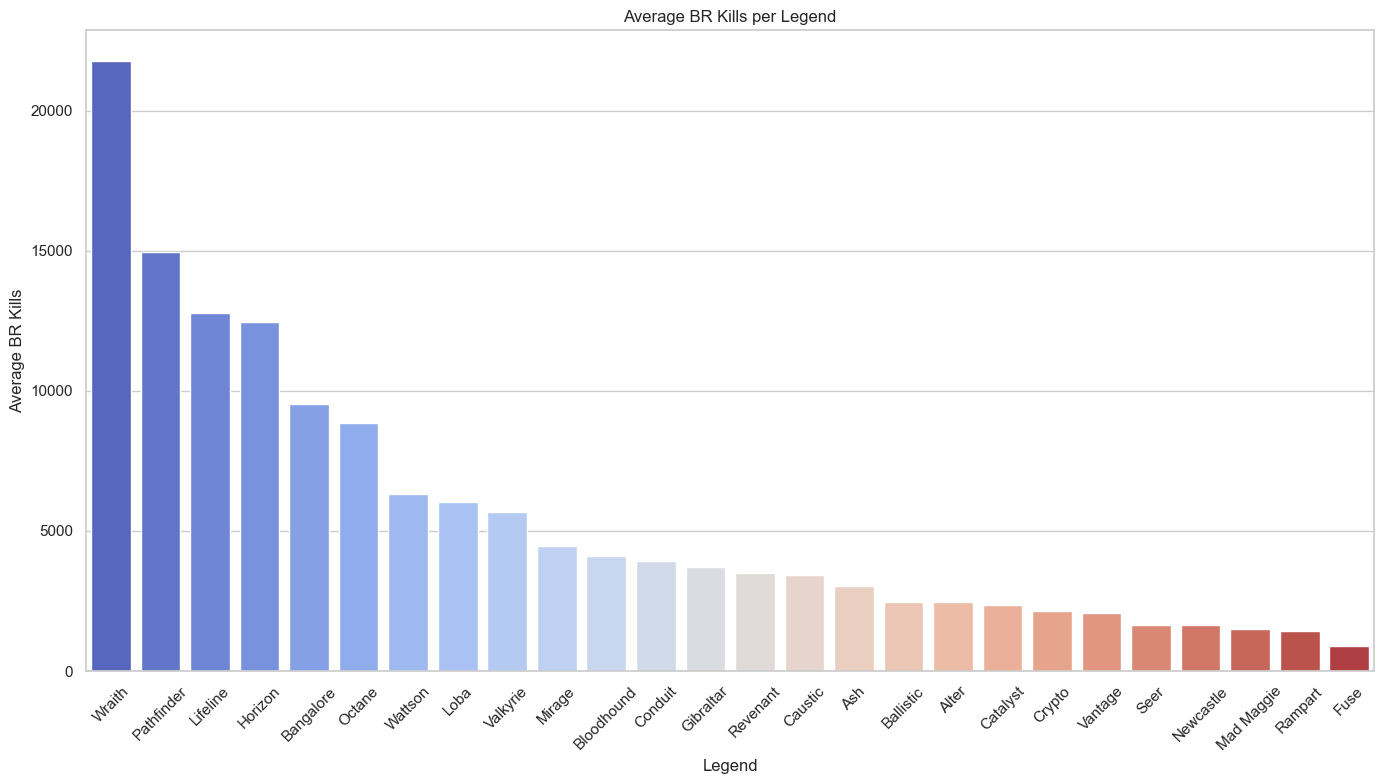

In [171]:
# Sort Legends by average BR Kills in descending order
legend_means_kills = legend_means.sort_values(by='BR Kills', ascending=False)

# Plot average BR Kills per Legend
plt.figure(figsize=(14, 8))
sns.barplot(x='legend', y='BR Kills', data=legend_means_kills, palette='coolwarm')
plt.title('Average BR Kills per Legend')
plt.xlabel('Legend')
plt.ylabel('Average BR Kills')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\altaa\AppData\Local\Temp\ipykernel_52092\2911850771.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='legend', y='BR Damage', data=legend_means_kills, palette='coolwarm')


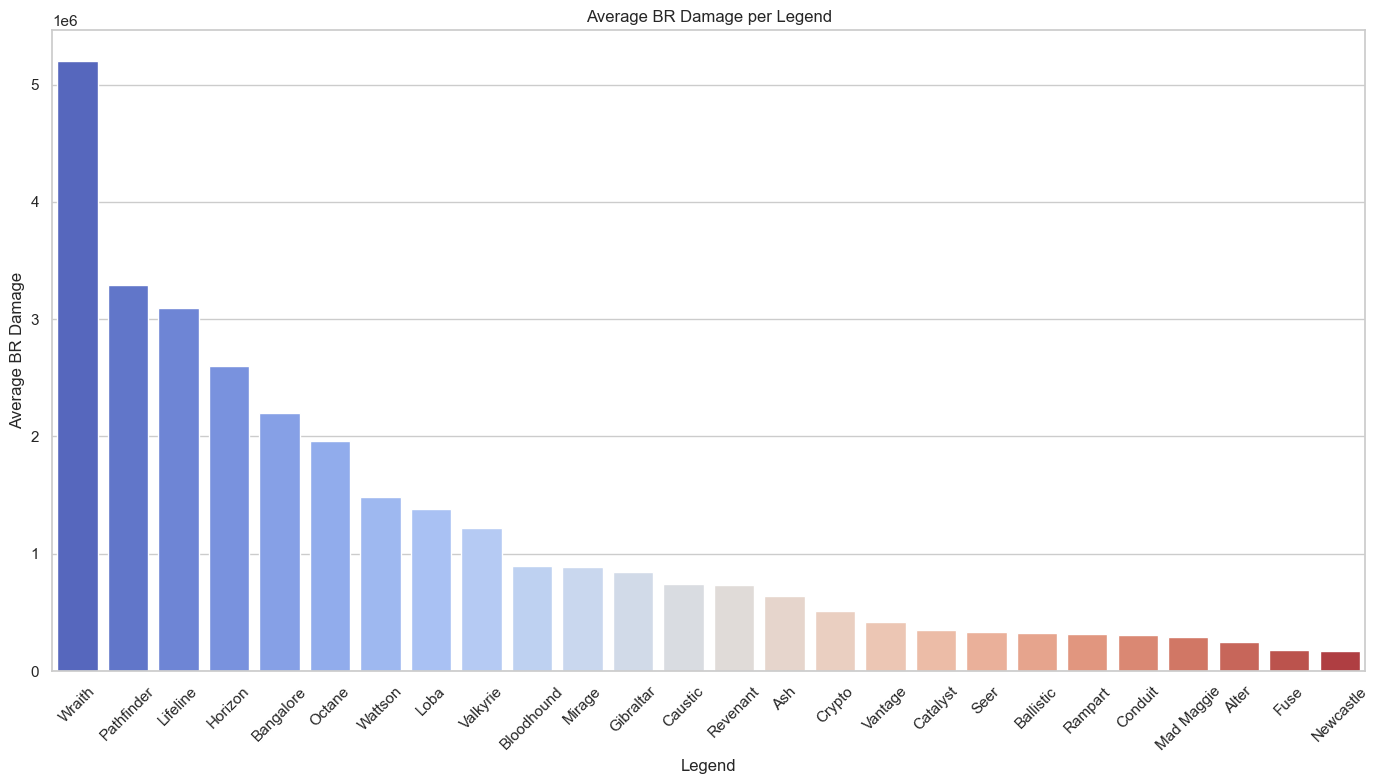

In [172]:
# Sort Legends by average BR Kills in descending order
legend_means_kills = legend_means.sort_values(by='BR Damage', ascending=False)

# Plot average BR Kills per Legend
plt.figure(figsize=(14, 8))
sns.barplot(x='legend', y='BR Damage', data=legend_means_kills, palette='coolwarm')
plt.title('Average BR Damage per Legend')
plt.xlabel('Legend')
plt.ylabel('Average BR Damage')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [173]:
# Calculate the correlation between BR Kills and BR Wins
correlation_kills_wins = legend_stats['BR Kills'].corr(legend_stats['BR Wins'])

In [174]:
print(f"Correlation between BR Kills and BR Wins: {correlation_kills_wins}")


Correlation between BR Kills and BR Wins: 0.8175040138719929


Correlation Matrix:
           BR Kills  BR Damage   BR Wins
BR Kills   1.000000   0.879810  0.817504
BR Damage  0.879810   1.000000  0.791569
BR Wins    0.817504   0.791569  1.000000


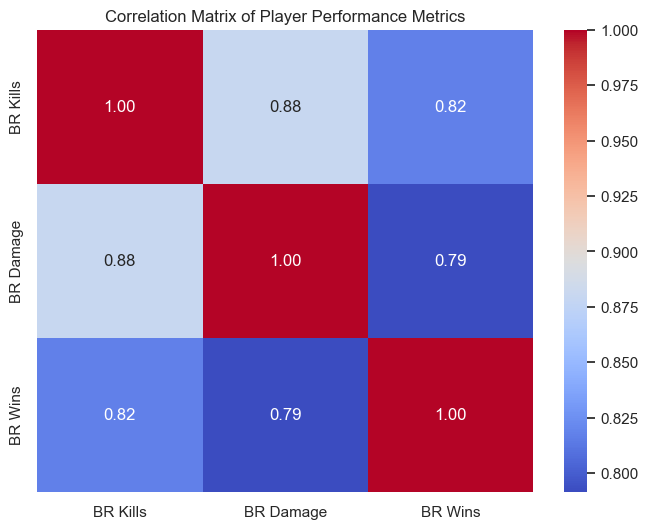

In [175]:
# Select the numerical columns relevant for correlation analysis (kills, damage, wins, etc.)
columns_for_analysis = ['BR Kills', 'BR Damage', 'BR Wins']  # Adjust as needed for other variables you may have

# Calculate the correlation matrix
correlation_matrix = legend_stats[columns_for_analysis].corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Visualize the correlation matrix with a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Matrix of Player Performance Metrics')
plt.show()

# PAS and CLustering

In [176]:
legend_stats.isnull().sum()

player_name        0
legend             0
BR Kills           0
BR Damage          0
BR Wins            0
legend_category    0
platform           0
dtype: int64

In [177]:
legend_stats.head()

,player_name,legend,BR Kills,BR Damage,BR Wins,legend_category,platform
0,#1 Valkuraee_Twitch TV,Valkyrie,72440.0,18966877.0,0.0,Skirmisher,PC
1,#1 Valkuraee_Twitch TV,Revenant,11710.0,0.0,0.0,Skirmisher,PC
2,( `),Wraith,20463.0,182528.0,0.0,Skirmisher,PC
3,( `),Pathfinder,12285.0,212733.0,0.0,Skirmisher,PC
4,( `),Gibraltar,6584.0,479149.0,0.0,Support,PC


C:\Users\altaa\AppData\Local\Temp\ipykernel_52092\341328964.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  legend_stats_cleaned['PAS'] = (legend_stats_cleaned['BR Kills'] / legend_stats_cleaned['BR Wins']) + \
C:\Users\altaa\AppData\Local\Temp\ipykernel_52092\341328964.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  legend_stats_cleaned['Cluster'] = kmeans.fit_predict(X)


       legend  BR Kills   BR Damage  BR Wins          PAS
20  Bangalore   65965.0  17967917.0   3602.0  5006.630205
24       Loba    1773.0    527521.0    112.0  4725.839286
27     Octane     662.0    199047.0     48.0  4160.604167
28   Valkyrie     418.0    116225.0     29.0  4022.172414
33     Wraith   14959.0   3560953.0    750.0  4767.882667
  legend_category          PAS     BR Wins      BR Kills     BR Damage
0         Assault  5932.951313  475.269300   7719.416517  2.076760e+06
1      Controller  6173.660556  382.582118   6416.266963  1.732182e+06
2           Recon  6179.221601  317.783767   4743.669291  1.238792e+06
3      Skirmisher  7743.609864  883.324996  15824.831944  4.131638e+06
4         Support  5675.783227  713.773585  10685.986792  2.879034e+06


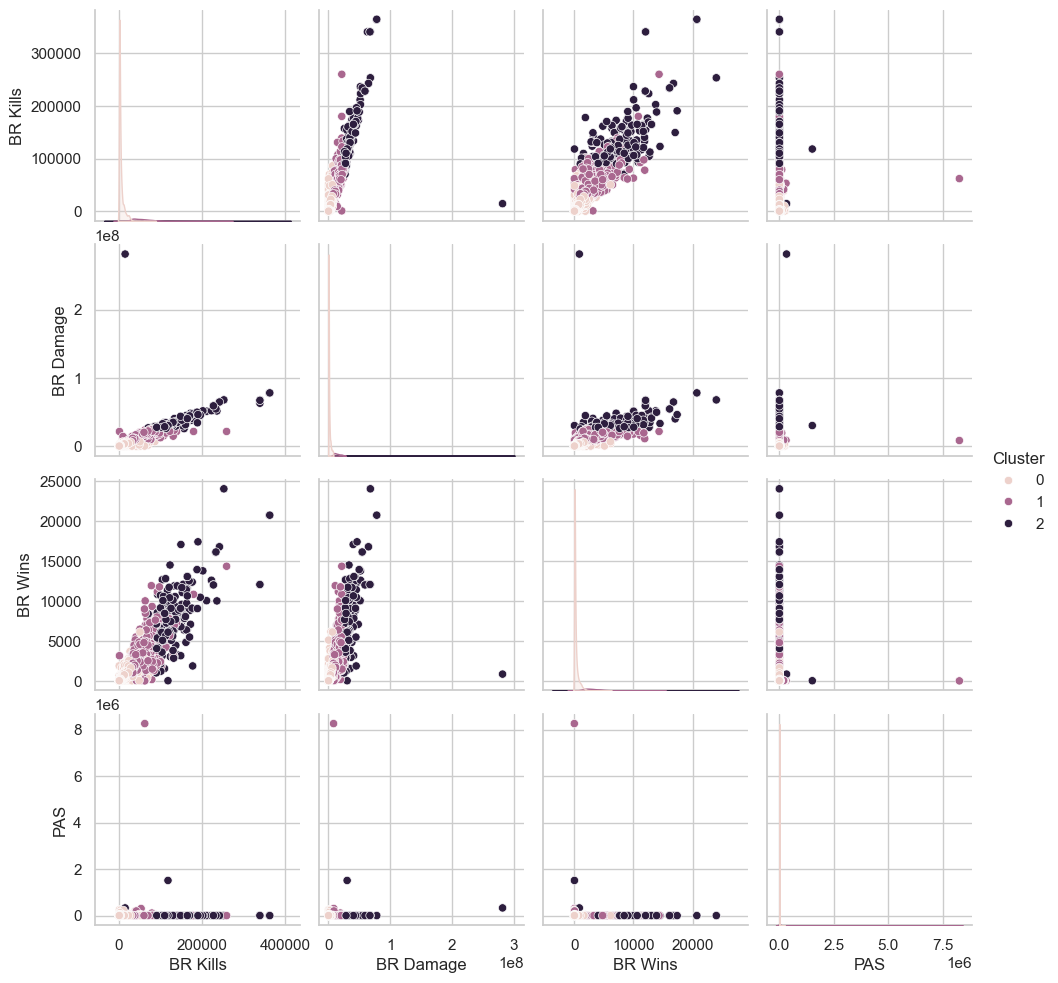

  legend_category          PAS     BR Wins      BR Kills     BR Damage  \
0         Assault  5932.951313  475.269300   7719.416517  2.076760e+06   
1      Controller  6173.660556  382.582118   6416.266963  1.732182e+06   
2           Recon  6179.221601  317.783767   4743.669291  1.238792e+06   
3      Skirmisher  7743.609864  883.324996  15824.831944  4.131638e+06   
4         Support  5675.783227  713.773585  10685.986792  2.879034e+06   

   Cluster  
0        2  
1        0  
2        4  
3        1  
4        3  


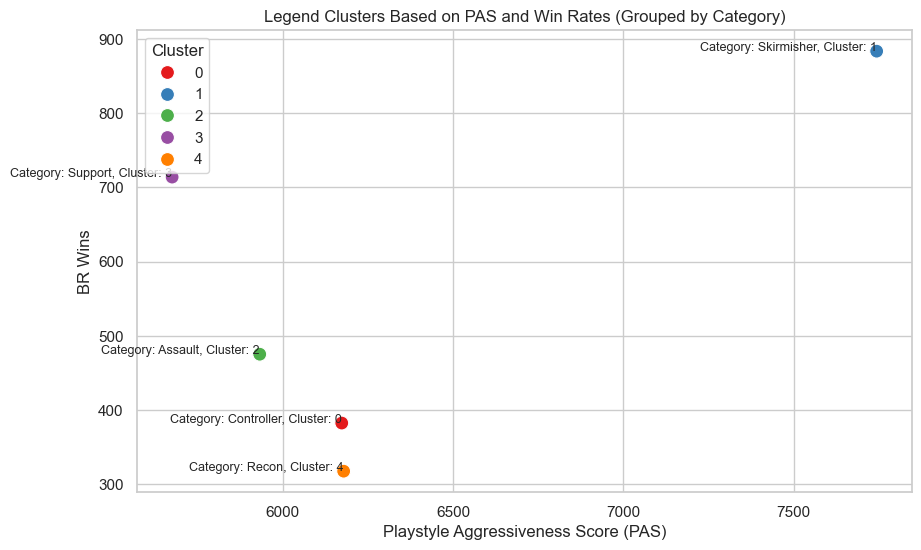

In [187]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your legend_stats dataframe is already loaded

# Step 1: Remove rows where 'BR Wins', 'BR Kills', or 'BR Damage' are zero
legend_stats_cleaned = legend_stats[(legend_stats['BR Wins'] != 0) & 
                                    (legend_stats['BR Damage'] != 0) & 
                                    (legend_stats['BR Kills'] != 0)]

# Step 2: Recalculate PAS with the cleaned dataset
legend_stats_cleaned['PAS'] = (legend_stats_cleaned['BR Kills'] / legend_stats_cleaned['BR Wins']) + \
                              (legend_stats_cleaned['BR Damage'] / legend_stats_cleaned['BR Wins'])

# Display a preview of the cleaned data to ensure zero values are removed and PAS is calculated correctly
print(legend_stats_cleaned[['legend', 'BR Kills', 'BR Damage', 'BR Wins', 'PAS']].head())

# Step 3: Group by Legend category to get average PAS and Win rates
legend_performance = legend_stats_cleaned.groupby('legend_category')[['PAS', 'BR Wins', 'BR Kills', 'BR Damage']].mean().reset_index()

# Step 4: Print the average PAS, Kills, Damage, and Win rates per Legend category
print(legend_performance)

# Step 5: Unsupervised Learning - K-Means Clustering on individual Legend data
# Prepare data for clustering (excluding Legend names)
X = legend_stats_cleaned[['BR Kills', 'BR Damage', 'BR Wins', 'PAS']]

# Perform K-Means Clustering (3 clusters for individual player data)
kmeans = KMeans(n_clusters=3, random_state=42)
legend_stats_cleaned['Cluster'] = kmeans.fit_predict(X)

# Step 6: Visualize the clustering results using a pairplot for individual data
sns.pairplot(legend_stats_cleaned, hue='Cluster', vars=['BR Kills', 'BR Damage', 'BR Wins', 'PAS'])
plt.show()

# Step 7: Clustering based on Grouped Data
# Prepare data for clustering based on grouped averages (averaged by Legend category)
X_grouped = legend_performance[['PAS', 'BR Wins', 'BR Kills', 'BR Damage']]

# Perform K-Means Clustering on grouped data (use 5 clusters for the 5 categories)
kmeans_grouped = KMeans(n_clusters=5, random_state=42)
legend_performance['Cluster'] = kmeans_grouped.fit_predict(X_grouped)

# Step 8: Print the grouped data with clusters
print(legend_performance)

# Step 9: Visualize the clusters of PAS, Wins, Kills, and Damage for grouped data
plt.figure(figsize=(10, 6))

# Scatter plot with clusters
scatter = sns.scatterplot(data=legend_performance, x='PAS', y='BR Wins', hue='Cluster', palette='Set1', s=100)

# Add labels for each data point (legend category and cluster)
for i in range(len(legend_performance)):
    plt.text(legend_performance['PAS'].iloc[i], 
             legend_performance['BR Wins'].iloc[i], 
             f"Category: {legend_performance['legend_category'].iloc[i]}, Cluster: {legend_performance['Cluster'].iloc[i]}",
             fontsize=9, 
             ha='right')  # Adjust 'ha' for horizontal alignment if needed

# Customize plot
plt.title('Legend Clusters Based on PAS and Win Rates (Grouped by Category)')
plt.xlabel('Playstyle Aggressiveness Score (PAS)')
plt.ylabel('BR Wins')

# Show the plot
plt.show()


C:\Users\altaa\AppData\Local\Temp\ipykernel_52092\396651078.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  legend_stats_cleaned['PAS'] = (legend_stats_cleaned['BR Kills'] / legend_stats_cleaned['BR Wins']) + \


  legend_category            PAS     BR Wins      BR Kills     BR Damage
0         Assault  235523.752958  180.083238   4454.129410  9.843550e+05
1      Controller  190406.675209  141.796423   3597.691985  7.904377e+05
2           Recon  181281.521620  107.674905   2722.600764  5.893133e+05
3      Skirmisher  542064.983955  455.821591  11614.036446  2.591729e+06
4         Support  250671.202967  301.487932   6424.668953  1.413905e+06


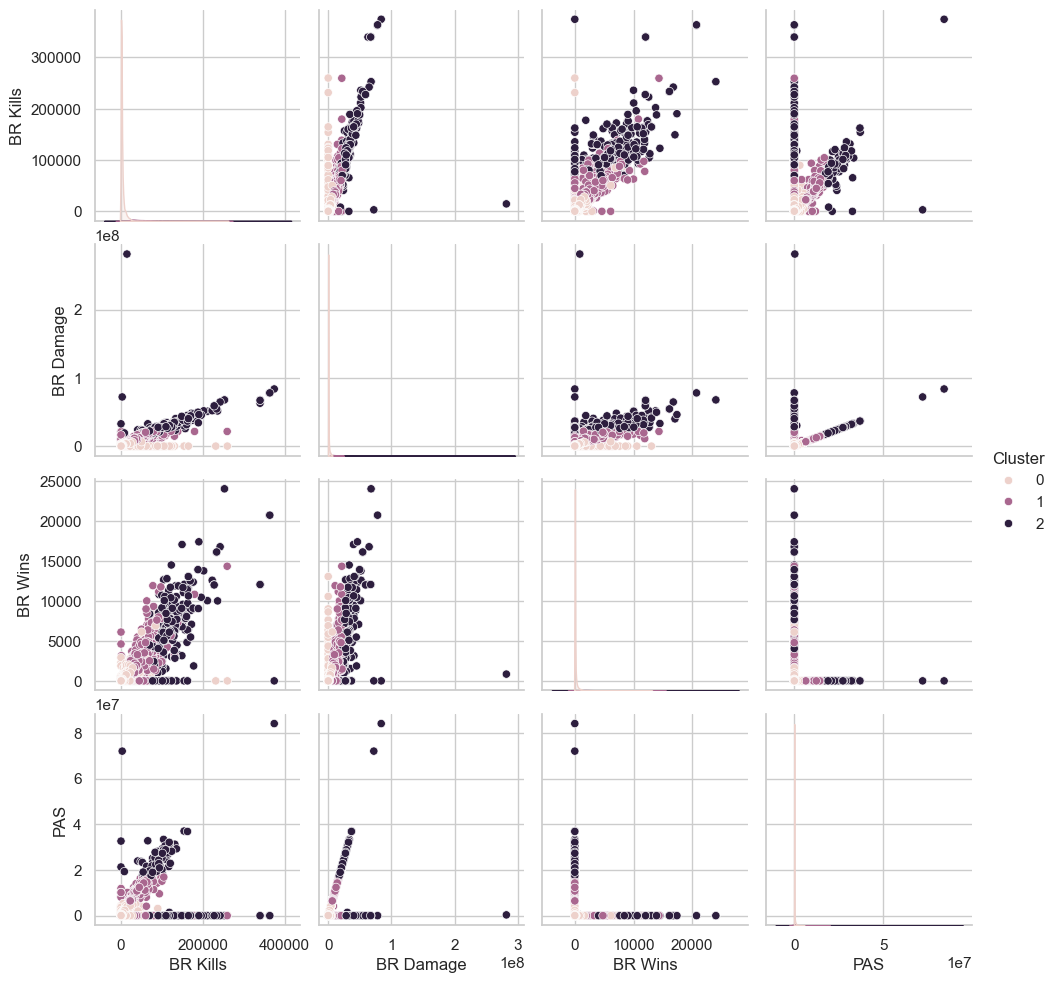

  legend_category            PAS     BR Wins      BR Kills     BR Damage  \
0         Assault  235523.752958  180.083238   4454.129410  9.843550e+05   
1      Controller  190406.675209  141.796423   3597.691985  7.904377e+05   
2           Recon  181281.521620  107.674905   2722.600764  5.893133e+05   
3      Skirmisher  542064.983955  455.821591  11614.036446  2.591729e+06   
4         Support  250671.202967  301.487932   6424.668953  1.413905e+06   

   Cluster  
0        2  
1        0  
2        4  
3        1  
4        3  


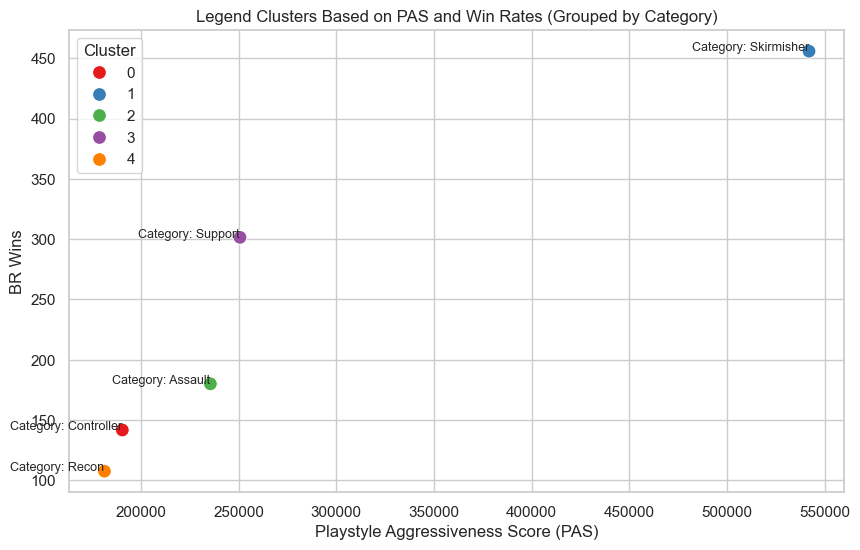

In [186]:
from sklearn.cluster import KMeans


# Remove rows where 'BR Wins' or 'BR Damage' are zero
legend_stats_cleaned = legend_stats[(legend_stats['BR Wins'] != 0) & (legend_stats['BR Damage'] != 0)]

# Calculate the Playstyle Aggressiveness Score (PAS)
# Ensure that 'BR Kills', 'BR Damage', and 'BR Wins' columns exist
legend_stats['PAS'] = (legend_stats['BR Kills'] / (legend_stats['BR Wins'] + 1)) + \
                      (legend_stats['BR Damage'] / (legend_stats['BR Wins'] + 1))


# Recalculate PAS with the cleaned dataset
legend_stats_cleaned['PAS'] = (legend_stats_cleaned['BR Kills'] / legend_stats_cleaned['BR Wins']) + \
                              (legend_stats_cleaned['BR Damage'] / legend_stats_cleaned['BR Wins'])

# Continue with the rest of your analysis (clustering, visualizations, etc.)

# Group by Legend category to get average PAS and Win rates
legend_performance = legend_stats.groupby('legend_category')[['PAS', 'BR Wins', 'BR Kills', 'BR Damage']].mean().reset_index()

# Print the average PAS, Kills, Damage, and Win rates per Legend category
print(legend_performance)

# Unsupervised Learning: K-Means Clustering on PAS, Wins, Kills, and Damage
# Cluster based on individual data first
X = legend_stats[['BR Kills', 'BR Damage', 'BR Wins', 'PAS']]

# Perform K-Means Clustering (3 clusters for individual player data)
kmeans = KMeans(n_clusters=3, random_state=42)
legend_stats['Cluster'] = kmeans.fit_predict(X)

# Visualize the clustering results using a pairplot for individual data
sns.pairplot(legend_stats, hue='Cluster', vars=['BR Kills', 'BR Damage', 'BR Wins', 'PAS'])
plt.show()

# Now let's add the Cluster information to the grouped legend_performance dataframe (for category-level analysis)

# Prepare data for clustering based on grouped averages (averaged by Legend category)
X_grouped = legend_performance[['PAS', 'BR Wins', 'BR Kills', 'BR Damage']]

# Perform K-Means Clustering on grouped data (5 clusters for 5 categories)
kmeans_grouped = KMeans(n_clusters=5, random_state=42)
legend_performance['Cluster'] = kmeans_grouped.fit_predict(X_grouped)

# Print the grouped data with clusters
print(legend_performance)

# Visualize the clusters of PAS, Wins, Kills, and Damage for grouped data
plt.figure(figsize=(10, 6))

# Scatter plot with clusters
scatter = sns.scatterplot(data=legend_performance, x='PAS', y='BR Wins', hue='Cluster', palette='Set1', s=100)

# Add labels for each data point (the legend category and cluster)
for i in range(len(legend_performance)):
    plt.text(legend_performance['PAS'].iloc[i], 
             legend_performance['BR Wins'].iloc[i], 
             f"Category: {legend_performance['legend_category'].iloc[i]}",
             fontsize=9, 
             ha='right')  # Adjust 'ha' for horizontal alignment if needed

# Customize plot
plt.title('Legend Clusters Based on PAS and Win Rates (Grouped by Category)')
plt.xlabel('Playstyle Aggressiveness Score (PAS)')
plt.ylabel('BR Wins')

# Show the plot
plt.show()

